Przykład 1

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
# przechodzimy na klasyfikację binarną
y = y == 2 # klasy 0-1: false, klasa 2: true

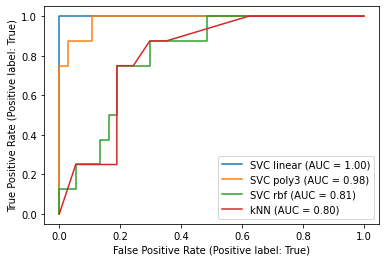

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, ax = plt.subplots()
svc1 = SVC(kernel='linear')
svc1.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc1, X_test, y_test, ax=ax, name='SVC linear')

svc2 = SVC(kernel='poly')
svc2.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc2, X_test, y_test, ax=ax, name='SVC poly3')

svc3 = SVC(kernel='rbf')
svc3.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc3, X_test, y_test, ax=ax, name='SVC rbf')

from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=56) # modyfikować n_neighbors
kNN.fit(X_train, y_train)
RocCurveDisplay.from_estimator(kNN, X_test, y_test, ax=ax, name='kNN')
plt.show()

Przykład 2

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_test_pred = svc.predict(X_test) # predykcja wartości zmiennej zależnej


In [21]:
# Obliczanie współczynników oceny modelu dla zbioru uczącego
print('\nAccuracy (train):', accuracy_score(y_train, svc.predict(X_train)))
# Obliczanie współczynników oceny modelu dla zbioru testowego
print('Accuracy (test):', accuracy_score(y_test, y_test_pred), '\n')


Accuracy (train): 0.9924812030075187
Accuracy (test): 0.9777777777777777 



In [22]:
# Raport oceny modelu (zbiór testowy) - osobno dla każdej klasy
labels = np.unique(y) # wybór unikalnych etykiet
print(classification_report(y_test, y_test_pred, labels=labels)) # raport

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.98        21
           2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45




Confusion matrix - plot


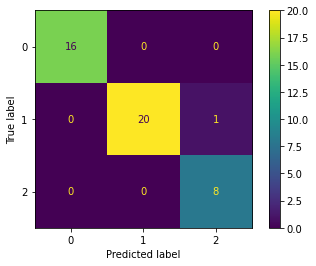

In [23]:
# Obliczenie macierzy pomyłek i wyświetlenie w formie graficznej
print('\nConfusion matrix - plot')
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

Przykład 3

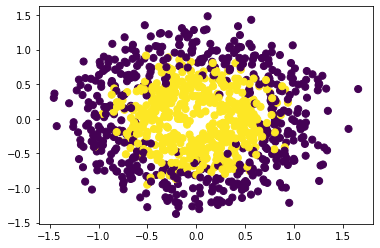

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_blobs, make_moons, make_circles

X, y = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=0)
#X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50, c=y)
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(kernel='rbf', C=1, gamma=10) # rbf, poly, C=?, gamma=?
svc.fit(X_train, y_train)

print('Accuracy (train):', accuracy_score(y_train, svc.predict(X_train)))
print('\nAccuracy (test):', accuracy_score(y_test, svc.predict(X_test)))

print('Precision (test):', precision_score(y_test, svc.predict(X_test)))
print('Recall (test):', recall_score(y_test, svc.predict(X_test)))

Accuracy (train): 0.8893333333333333

Accuracy (test): 0.9
Precision (test): 0.9354838709677419
Recall (test): 0.8721804511278195


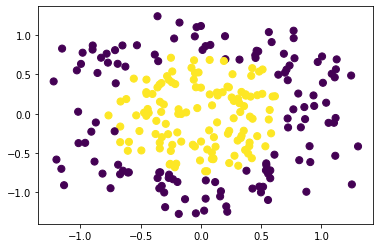

In [34]:
plt.scatter(X_test[:, 0], X_test[:, 1], s=50, c=svc.predict(X_test))
plt.show()

In [9]:
# Wyszukiwanie najlepszych parametrów
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=SVC(), param_grid={'C': [10, 4, 1, 0.1], 'gamma': [1, 10, 20]}, verbose=2)
clf.fit(X_train, y_train)
print('\nBest: ', clf.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=20; total time=   0.0s
[CV] END .....................................C=

Przykład 4

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

df = pd.read_csv('/content/drive/My Drive/Dane/diabetes.csv')
print(df.head())
#sns.pairplot(df, hue='Outcome', palette='dark', height=2)
#plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
X = df.values[:, 0:8]
y = df.values[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svc = SVC(kernel='linear', C=2, gamma=2)

print('Cross-validation')
# walidacja krzyżowa z podziałem zbioru na 5 części
scores = cross_val_score(svc, X_train, y_train, cv=5)
# dokładność dla każdego podzbioru, średnia dokładność i std
print('Accuracy: ', scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std())

Cross-validation
Accuracy:  [0.7398374  0.79674797 0.7398374  0.71544715 0.79508197]
Accuracy (mean):  0.7573903771824603
Accuracy (std):  0.03269594450240408


In [4]:
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)
print('\nAccuracy (train):', accuracy_score(y_train, svc.predict(X_train)))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred), '\n')
labels = np.unique(y)
print(classification_report(y_test, y_test_pred, labels=labels))


Accuracy (train): 0.7638436482084691
Accuracy (test): 0.8181818181818182 

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [6]:
print('Confusion matrix')
cm = confusion_matrix(y_test, y_test_pred)
print(pd.DataFrame(cm, index=['is_healty', 'is_diabetes'], columns=['precited_healthy', 'predicted_diabetes']))

Confusion matrix
             precited_healthy  predicted_diabetes
is_healty                  97                  10
is_diabetes                18                  29


In [ ]:
print('Confusion matrix - plot')
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap="Blues")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler #autoskalowanie
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)

In [8]:
svc = SVC(kernel='poly', degree=2, C=0.5)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.712
Accuracy on test set: 0.734


Zadanie domowe

In [18]:
import scipy.io as spio
mat = spio.loadmat('/content/drive/My Drive/Dane/sokizSGF.mat', squeeze_me=True)
X = mat['xaallsgf']
y = mat['ysgf']

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[ 8.919  8.156  7.729 ...  9.43   9.758 10.117]
 [ 9.613  8.781  8.354 ...  9.43   9.758 10.094]
 [10.178  9.277  8.827 ...  9.438  9.75  10.094]
 ...
 [ 5.547  4.967  4.616 ...  7.622  7.912  8.217]
 [ 5.592  4.99   4.654 ...  7.614  7.896  8.194]
 [ 5.6    5.005  4.654 ...  7.622  7.904  8.224]]


In [33]:
svc = SVC(kernel='poly', C=15, gamma=25)

print('Cross-validation')
# walidacja krzyżowa z podziałem zbioru na 5 części
scores = cross_val_score(svc, X_train, y_train, cv=5)
# dokładność dla każdego podzbioru, średnia dokładność i std
print('Accuracy: ', scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std())

Cross-validation
Accuracy:  [0.87804878 0.93902439 0.91463415 0.95061728 0.96296296]
Accuracy (mean):  0.92905751279735
Accuracy (std):  0.03007878388797106


In [34]:
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)
print('Accuracy (train):', accuracy_score(y_train, svc.predict(X_train)))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred), '\n')
labels = np.unique(y)
print(classification_report(y_test, y_test_pred, labels=labels))

Accuracy (train): 1.0
Accuracy (test): 0.9313725490196079 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
          10       1.00      0.81      0.90        16
          20       0.92      0.96      0.94        23
          30       0.94      0.85      0.89        20
          40       0.90      1.00      0.95        18
          50       1.00      1.00      1.00        13

    accuracy                           0.93       102
   macro avg       0.94      0.94      0.93       102
weighted avg       0.94      0.93      0.93       102



In [35]:
print('Confusion matrix')
cm = confusion_matrix(y_test, y_test_pred)
print(pd.DataFrame(cm, index = labels, columns=labels))

Confusion matrix
    0   10  20  30  40  50
0   12   0   0   0   0   0
10   2  13   1   0   0   0
20   0   0  22   1   0   0
30   0   0   1  17   2   0
40   0   0   0   0  18   0
50   0   0   0   0   0  13


Confusion matrix - plot


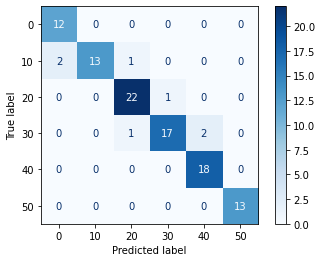

In [36]:
print('Confusion matrix - plot')
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap="Blues")
plt.show()